# 1. Preparing the images

In [1]:
import tensorflow as tf
from tensorflow import keras

from tqdm import tqdm
import numpy as np
import gc
import matplotlib.pyplot as plt


working_path = '/kaggle/output/working_directory/'
train_label_path = '/kaggle/input/uos-com2028/train.txt'
train_images_path = '/kaggle/input/uos-com2028/train/train'
test_dir = "../input/uos-com2028/test"
IM_SIZE = 224
batch_size = 32
limit = 1000

In [2]:
#1.1 Checking if the directories already exist. 
import shutil


try:
    shutil.rmtree(working_path)
except OSError as e:
    print("Error: %s : %s" % (working_path, e.strerror))


Error: /kaggle/output/working_directory/ : No such file or directory


In [3]:
#1.2 MAKING 23 DIRECTORIES
import os

for i in range(23):
    dir_path = working_path + str(i)
    try:
        os.makedirs(dir_path)
    except OSError:
        print ("Creation of the directory %s failed" % dir_path)
    else:
        print ("Successfully created the directory %s " % dir_path)

Successfully created the directory /kaggle/output/working_directory/0 
Successfully created the directory /kaggle/output/working_directory/1 
Successfully created the directory /kaggle/output/working_directory/2 
Successfully created the directory /kaggle/output/working_directory/3 
Successfully created the directory /kaggle/output/working_directory/4 
Successfully created the directory /kaggle/output/working_directory/5 
Successfully created the directory /kaggle/output/working_directory/6 
Successfully created the directory /kaggle/output/working_directory/7 
Successfully created the directory /kaggle/output/working_directory/8 
Successfully created the directory /kaggle/output/working_directory/9 
Successfully created the directory /kaggle/output/working_directory/10 
Successfully created the directory /kaggle/output/working_directory/11 
Successfully created the directory /kaggle/output/working_directory/12 
Successfully created the directory /kaggle/output/working_directory/13 
Su

In [4]:
#1.3 Importing data labels, so we could sort the images.
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv(train_label_path, names=["id", "ground_truth"], delim_whitespace=True)
df = df.drop("id", 1)

y_train = df.to_numpy()
print(df.shape)


(10270, 1)


In [5]:
#1.4 Coping the files and sorting into directories
import os
from shutil import copyfile
i=0
for dirname, _, filenames in os.walk(train_images_path):
    a=0
    for filename in filenames:
        input = os.path.join(dirname, filename)
        label = y_train[int(filename[:-4])][0]
        output = working_path + str(label) + '/' + filename
        copyfile(input, output)
        i+=1
        
if i == 10270:
    print("10270 files were successfully copied!" )
del i

10270 files were successfully copied!


In [6]:
import math

def get_limit(limit,count):
    limit = math.floor(limit/count-1)
    limit = max(0, limit)
    if limit > 8:
        limit = 7
    return limit

In [7]:
# CREATE LIMIT FOR EACH CLASS 
import pathlib

counter_class = np.empty((23,2))  
for i in range(23):
    count = 0
    path = working_path + str(i)
    for path in pathlib.Path(path).iterdir():
        if path.is_file():
            count += 1
    counter_class[i][0] = count
    counter_class[i][1] = get_limit(limit,count)
    print("Class id: %i, current count is: %i, given limit is: %i" %(i, counter_class[i][0], counter_class[i][1]))

Class id: 0, current count is: 96, given limit is: 7
Class id: 1, current count is: 486, given limit is: 1
Class id: 2, current count is: 626, given limit is: 0
Class id: 3, current count is: 166, given limit is: 5
Class id: 4, current count is: 98, given limit is: 7
Class id: 5, current count is: 298, given limit is: 2
Class id: 6, current count is: 496, given limit is: 1
Class id: 7, current count is: 1378, given limit is: 0
Class id: 8, current count is: 336, given limit is: 1
Class id: 9, current count is: 94, given limit is: 7
Class id: 10, current count is: 32, given limit is: 7
Class id: 11, current count is: 614, given limit is: 0
Class id: 12, current count is: 56, given limit is: 7
Class id: 13, current count is: 188, given limit is: 4
Class id: 14, current count is: 88, given limit is: 7
Class id: 15, current count is: 1068, given limit is: 0
Class id: 16, current count is: 440, given limit is: 1
Class id: 17, current count is: 68, given limit is: 7
Class id: 18, current cou

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
import os, sys
import numpy as np

import keras.preprocessing.image as Image


SEED = 1337
data_augmentation = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomContrast(0.25, seed=SEED),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2, seed=SEED),
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", seed=SEED),
        tf.keras.layers.experimental.preprocessing.RandomFlip("vertical", seed=SEED),
        tf.keras.layers.experimental.preprocessing.RandomTranslation(0.1, 0.1, seed=SEED),
        tf.keras.layers.experimental.preprocessing.RandomZoom(.5, .2, seed=SEED)
    ])

data_augmentation2 = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.15),
        tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.15),
        tf.keras.layers.experimental.preprocessing.RandomFlip(),
        tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(.5, .3)
    ])

In [9]:
number = 10270

for i in tqdm(range(23)):
    path = working_path + str(i)
    if counter_class[i][1] > 0:
        for main_image_path in pathlib.Path(path).iterdir():
            img = Image.load_img(main_image_path, target_size=(IM_SIZE,IM_SIZE))
            img = Image.img_to_array(img, dtype = np.float16)
            img = img/255.
            img = tf.expand_dims(img,0)
            #print("MAIN IMAGE PATH %s" %main_image_path)
            for x in range(int(counter_class[i][1])):
                augmented_image = data_augmentation(img)
                location = str(path) + "/" + str(number) + ".jpg"
                Image.save_img(location, augmented_image[0])
                number+=1
                del augmented_image
            del img
gc.collect()

100%|██████████| 23/23 [02:27<00:00,  6.39s/it]


976

In [10]:
# # GETTING PICTURE FOR DATA AUGMENTATION POSTER !!!!!!!!!! 

# img = Image.load_img("../input/uos-com2028/train/train/18.jpg", target_size=(IM_SIZE,IM_SIZE))
# img = Image.img_to_array(img, dtype = np.float16)
# img = img/255.
# image = tf.expand_dims(img, 0)
# plt.figure(figsize=(10, 10))

# for i in range(9):
#   augmented_image = data_augmentation(image)
#   ax = plt.subplot(3, 3, i + 1)
#   plt.imshow(augmented_image[0])
#   plt.axis("off")


RECOUNT

In [11]:
import pathlib
a = 0
counter = np.empty(23) 
j = 0
count = 0
for i in range(23):
    count = 0
    path = working_path + str(i)
    for path in pathlib.Path(path).iterdir():
        count+=1
    print("Class: %i, count: %i" %(i,count))
    if count > limit:
        j = j + limit
    else:
        j = j + count
total_count = j
print(total_count)

Class: 0, count: 768
Class: 1, count: 972
Class: 2, count: 626
Class: 3, count: 996
Class: 4, count: 784
Class: 5, count: 894
Class: 6, count: 992
Class: 7, count: 1378
Class: 8, count: 672
Class: 9, count: 752
Class: 10, count: 256
Class: 11, count: 614
Class: 12, count: 448
Class: 13, count: 940
Class: 14, count: 704
Class: 15, count: 1068
Class: 16, count: 880
Class: 17, count: 544
Class: 18, count: 1658
Class: 19, count: 968
Class: 20, count: 752
Class: 21, count: 800
Class: 22, count: 950
18312


#### CODE

In [12]:
import random
import numpy as np
from pathlib import Path


# @return list of paths per class 'x'
def paths_to_load_per_class(class_num, limit):
    list_of_paths = []
    path = working_path + str(class_num)
    for path in pathlib.Path(path).iterdir():
        full_path = path.absolute()
        full_path = full_path.as_posix()
        list_of_paths.append(full_path)
    random.shuffle(list_of_paths)
    if len(list_of_paths) < limit:
        return list_of_paths,[]
    else:
        print("id: %i, no: %i" %(class_num,len(list_of_paths[limit:])))
        return list_of_paths[:limit], list_of_paths[limit:]
    
def paths_to_load_overall(limit):
    lista_rest = []
    lista_train = []
    lista_valid = []
    for i in tqdm(range(23)):
        temp,cutoff = paths_to_load_per_class(i,limit)
        lista_rest += cutoff
        lista_train += temp[:int(len(temp)*.70)]
        lista_valid += temp[int(len(temp)*.70):]
    random.Random(4).shuffle(lista_train)
    random.Random(4).shuffle(lista_valid)
    return lista_train, lista_valid, lista_rest

        

In [13]:
def split_with_label(temp_list):
    i=0
    file_ids = []
    for path in temp_list:
        p = Path(path)
        label = p.parts[4]
        path = p.absolute()
        path = path.as_posix()
#         print("%s, %s" %(path,label))
        file_ids.append([path,label])
    print(file_ids[:10])
    return file_ids


In [14]:
lista_train, lista_valid, lista_rest = paths_to_load_overall(limit)

100%|██████████| 23/23 [00:00<00:00, 230.55it/s]

id: 7, no: 378
id: 15, no: 68
id: 18, no: 658


In [15]:
lista_train = split_with_label(lista_train)
lista_valid = split_with_label(lista_valid)
lista_rest = split_with_label(lista_rest)

[['/kaggle/output/working_directory/17/9333.jpg', '17'], ['/kaggle/output/working_directory/2/5367.jpg', '2'], ['/kaggle/output/working_directory/15/9373.jpg', '15'], ['/kaggle/output/working_directory/9/7902.jpg', '9'], ['/kaggle/output/working_directory/9/14707.jpg', '9'], ['/kaggle/output/working_directory/1/4401.jpg', '1'], ['/kaggle/output/working_directory/6/13574.jpg', '6'], ['/kaggle/output/working_directory/6/148.jpg', '6'], ['/kaggle/output/working_directory/8/2159.jpg', '8'], ['/kaggle/output/working_directory/9/14879.jpg', '9']]
[['/kaggle/output/working_directory/0/10843.jpg', '0'], ['/kaggle/output/working_directory/22/5587.jpg', '22'], ['/kaggle/output/working_directory/18/10131.jpg', '18'], ['/kaggle/output/working_directory/21/4308.jpg', '21'], ['/kaggle/output/working_directory/15/2347.jpg', '15'], ['/kaggle/output/working_directory/20/7644.jpg', '20'], ['/kaggle/output/working_directory/8/14291.jpg', '8'], ['/kaggle/output/working_directory/12/15558.jpg', '12'], ['/k

In [16]:
len_train = len(lista_train)
len_valid = len(lista_valid)
len_rest = len(lista_rest)
print(len_train)
print(len_valid)
print(len_rest)

12810
5502
1104


In [17]:
gc.collect()

44

In [18]:
from keras.utils import Sequence
import numpy as np
import keras
import cv2

class DataGenerator(Sequence):
    'Generates data for Keras'
    def __init__(self, file_ids, batch_size=32):
        self.file_ids = file_ids
        self.batch_size = batch_size
        
    def __len__(self):
        return int(np.floor(len(self.file_ids) / self.batch_size))
    
    def read_and_reisze_image(self,image_path):
        im = cv2.imread(image_path)
        im_resized = cv2.resize(im, (IM_SIZE, IM_SIZE), interpolation=cv2.INTER_LINEAR)
        im_converted = cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB)
        return im_converted
        
    def __getitem__(self, index):
        file_id = self.file_ids[index * self.batch_size:(index + 1) * self.batch_size]
        images = [self.read_and_reisze_image(f[0]) for f in file_id]
        labels = [int(f[1]) for f in file_id]
        labels = keras.utils.to_categorical(labels, num_classes=23)
        return np.asarray(images), labels

In [19]:
training_generator = DataGenerator(lista_train[:])
# Test data output
training_generator.__getitem__(0)[0].shape

(32, 224, 224, 3)

In [20]:
validation_generator = DataGenerator(lista_valid[:])
# Test data output
validation_generator.__getitem__(0)[0].shape

(32, 224, 224, 3)

In [21]:
temp = lista_valid + lista_rest
cutoff_generator = DataGenerator((temp)[:])
cutoff_generator.__getitem__(0)[0].shape

(32, 224, 224, 3)

In [22]:
import keras
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import layers 
from tensorflow.keras import Model
from tensorflow.keras import Input

# Loading the model

In [23]:
# from tensorflow.keras.applications.inception_v3 import InceptionV3
# base_model = InceptionV3(input_shape = (IM_SIZE, IM_SIZE, 3), 
#                          include_top = False, 
#                          weights = 'imagenet')

87916544/87910968 [==============================] - 1s 0us/step


In [31]:
base_model = tf.keras.applications.EfficientNetB5(
    include_top=False,
    weights='imagenet',
    input_shape = (IM_SIZE, IM_SIZE, 3))

115269632/115263384 [==============================] - 1s 0us/step


In [ ]:
# from tensorflow.keras.applications.xception import Xception
# base_model = Xception(input_shape = (IM_SIZE, IM_SIZE, 3),
#                       include_top = False,
#                       weights = 'imagenet')


In [ ]:
# from tensorflow.keras.applications.vgg16 import VGG16
# base_model = VGG16(input_shape = (IM_SIZE, IM_SIZE, 3),
#                       include_top = False,
#                       weights = 'imagenet')

# Base Model Training

In [32]:
base_model.trainable = True

In [33]:
inputs = Input(shape=(IM_SIZE, IM_SIZE, 3))
x = data_augmentation2(inputs)

x = base_model(inputs)
x = layers.GlobalAveragePooling2D()(x)
# x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.60)(x)
output = layers.Dense(23, activation='softmax')(x)

model = Model(inputs, output)

In [ ]:
# x = base_model.output
# x = layers.GlobalAveragePooling2D()(x)
# # x = layers.Dense(512, activation='relu')(x)
# x = layers.Dropout(0.5)(x)
# predictions = layers.Dense(23, activation='softmax')(x)

# model = Model(base_model.input, predictions)

In [ ]:
# x = base_model.output
# y_pred = layers.Dense(23, activation='softmax')(x)
# model = Model(inputs=base_model.input, outputs=y_pred)

# Enhanced Model Training

In [ ]:
# base_model.trainable = True

In [ ]:
# x = base_model.output
# x = layers.GlobalAveragePooling2D()(x)
# x = layers.Dense(256, activation='relu')(x)
# x = layers.Dropout(0.55)(x)

# x = layers.Dense(512, activation='relu')(x)
# x = layers.Dropout(0.55)(x)
# predictions = layers.Dense(23, activation='softmax')(x)

# model = Model(base_model.input, predictions)

# Compile

In [34]:
##### RMSPROP #####

optRMSprop = keras.optimizers.RMSprop(
    learning_rate = 0.0001,)

##### ADAM #######
optAdam = keras.optimizers.Adam(learning_rate=0.0001)

##### SGD #######
learning_rate = 0.0001
decay_rate = learning_rate / 25
momentum = 0.9
sgd = keras.optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# sgd = keras.optimizers.SGD(lr=learning_rate)


model.compile(optimizer = optAdam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [35]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

filepath = 'best_model.h5'

es = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   verbose=1, 
                   patience=6)

ModelCheckpoint = ModelCheckpoint(filepath,
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.5, min_lr=2.5e-5)

callbacks_list = [ModelCheckpoint, es, learning_rate_reduction]

In [ ]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [143]:
 nb_epochs = 30
hist = model.fit(cutoff_generator,
                 validation_data = validation_generator,
                 steps_per_epoch =  (len_valid // (batch_size)+batch_size),
                 epochs = nb_epochs,
                 callbacks = callbacks_list)

206/206 [==============================] - 142s 689ms/step - loss: 0.0791 - accuracy: 0.9898


# GRAPH: Training and Validation Accuracy/Loss 

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [144]:
from keras.models import load_model

loaded_model = load_model('./best_model.h5')

# Cutoff evaluation


In [145]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = loaded_model.evaluate(validation_generator)
print("test loss, test acc:", results)

Evaluate on test data
171/171 [==============================] - 24s 124ms/step - loss: 0.1258 - accuracy: 0.9655
test loss, test acc: [0.12584777176380157, 0.9654605388641357]


In [41]:
from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
Y_pred = loaded_model.predict_generator(validation_generator, len_valid // (batch_size))
y_pred = np.argmax(Y_pred, axis=1)
y_true = np.argmax(labels, axis=1)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [42]:
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))

Confusion Matrix
[[226   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   2   1]
 [  0 269   0   1   4   0   3   0   1   0   0   0   1   0   0   6   2   1
    0   3   0   0   0]
 [  0   0 177   0   0   0   1   5   1   0   1   0   0   0   0   2   0   0
    0   0   0   0   0]
 [  0   0   0 292   0   0   0   0   0   0   0   1   0   0   0   0   1   0
    2   0   0   0   0]
 [  0   0   0   0 235   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0 265   0   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0]
 [  0   3   0   0   1   0 267   1   1   3   0   0   9   1   0   0   2   0
    1   0   3   0   4]
 [  0   0   4   0   0   0   1 288   0   0   0   0   1   0   0   0   1   0
    2   0   1   0   0]
 [  0   1   1   0   1   0   1   0 192   0   0   0   0   0   0   0   0   0
    0   2   0   0   0]
 [  1   0   0   0   0   0   2   0   0 215   0   0   0   0   0   0   0   0
    0   3   0   0   1]
 [  0   0   0

In [ ]:
import pandas as pd
import seaborn as sn

data = {'y_Actual':    labels,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(25, 25))

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [43]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[226   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   2   1]
 [  0 269   0   1   4   0   3   0   1   0   0   0   1   0   0   6   2   1
    0   3   0   0   0]
 [  0   0 177   0   0   0   1   5   1   0   1   0   0   0   0   2   0   0
    0   0   0   0   0]
 [  0   0   0 292   0   0   0   0   0   0   0   1   0   0   0   0   1   0
    2   0   0   0   0]
 [  0   0   0   0 235   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0 265   0   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0]
 [  0   3   0   0   1   0 267   1   1   3   0   0   9   1   0   0   2   0
    1   0   3   0   4]
 [  0   0   4   0   0   0   1 288   0   0   0   0   1   0   0   0   1   0
    2   0   1   0   0]
 [  0   1   1   0   1   0   1   0 192   0   0   0   0   0   0   0   0   0
    0   2   0   0   0]
 [  1   0   0   0   0   0   2   0   0 215   0   0   0   0   0   0   0   0
    0   3   0

<Figure size 432x288 with 0 Axes>

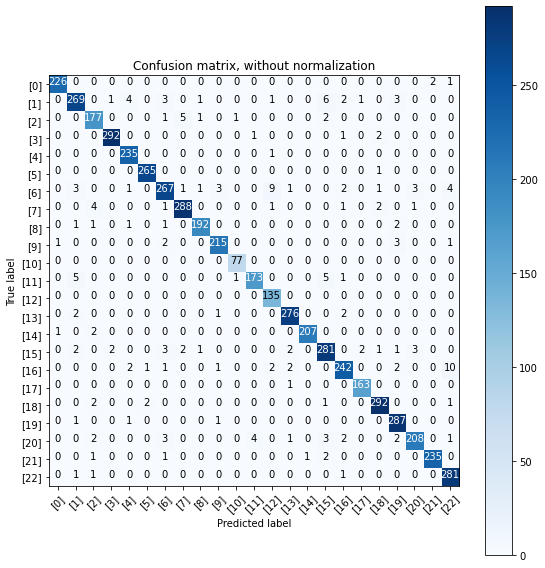

In [44]:
cnf_matrix = confusion_matrix(y_true[:6496], y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plt.figure(figsize=(8, 8))
 
plot_confusion_matrix(cnf_matrix, classes=[[x] for x in range(23)],
                      title='Confusion matrix, without normalization')

In [ ]:
image_path = "../input/uos-com2028/test/test/5.jpg"
im = cv2.imread(image_path)
im_resized = cv2.resize(im, (IM_SIZE, IM_SIZE), interpolation=cv2.INTER_LINEAR)
im_converted = cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB)

In [ ]:
plt.imshow(im_converted)

In [118]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall_score = recall_score(y_true, y_pred, average='weighted')
precision_score = precision_score(y_true, y_pred, average='weighted')
f1_score = f1_score(y_true, y_pred, average='weighted')

print("Average Precision: {}".format(precision_score))
print("Average Recall: {}".format(recall_score))
print("Average F1: {}".format(f1_score))

Average Precision: 0.9656567274149338
Average Recall: 0.9654605263157895
Average F1: 0.9653478788371641


In [79]:
target_names = []
for i in range(23):
    target_names.append(str(int(i))) 
print(target_names)
print(classification_report(y_true, y_pred, target_names=target_names))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.95      0.92      0.94       291
           2       0.93      0.95      0.94       187
           3       0.99      0.99      0.99       296
           4       0.96      1.00      0.98       236
           5       0.99      1.00      0.99       266
           6       0.94      0.90      0.92       296
           7       0.97      0.97      0.97       298
           8       0.98      0.97      0.97       198
           9       0.97      0.97      0.97       222
          10       0.97      1.00      0.99        77
          11       0.97      0.94      0.95       185
          12       0.91      1.00      0.95       135
          13       0.98      0.98      0.98       281
          14       1.00      0.99      0.99       210
      

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_true, y_pred,labels=[2,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_true, y_pred,labels=[2,0])
print('Classification report : \n',matrix)

Outcome values : 
 177 0 0 226
Classification report : 
               precision    recall  f1-score   support

           2       0.93      0.95      0.94       187
           0       0.99      0.99      0.99       229

   micro avg       0.96      0.97      0.97       416
   macro avg       0.96      0.97      0.96       416
weighted avg       0.96      0.97      0.97       416



In [92]:
x = keras.utils.to_categorical(y_true, num_classes=23)
y = Y_pred

In [97]:
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

n_classes=23
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(x[:, i], y[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(x.ravel(), y.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

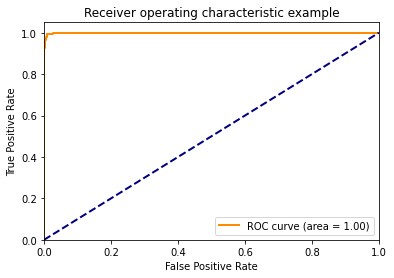

In [99]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


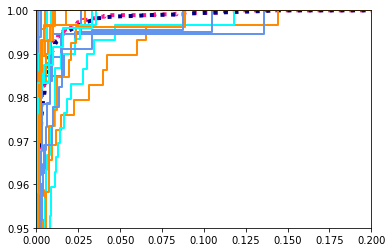

In [111]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0, 0.2])
plt.ylim([0.95, 1])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Some extension of Receiver operating characteristic to multi-class')
# plt.legend(loc="lower right")
plt.show()

# Test 0

In [123]:
def read_and_reisze_image(image_path):
        im = cv2.imread(image_path)
        im_resized = cv2.resize(im, (IM_SIZE, IM_SIZE), interpolation=cv2.INTER_LINEAR)
        im_converted = cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB)
        return im_converted

In [124]:
from keras.utils import Sequence
import numpy as np
import keras
import cv2

class TestDataGenerator(Sequence):
    'Generates data for Keras'
    def __init__(self, file_ids, batch_size=32):
        self.file_ids = file_ids
        self.batch_size = batch_size
        
    def __len__(self):
        return int(np.floor(len(self.file_ids) / self.batch_size))
    
    def read_and_reisze_image(self,image_path):
        im = cv2.imread(image_path)
        im_resized = cv2.resize(im, (IM_SIZE, IM_SIZE), interpolation=cv2.INTER_LINEAR)
        im_converted = cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB)
        return im_converted
        
    def __getitem__(self, index):
        file_id = self.file_ids[index * self.batch_size:(index + 1) * self.batch_size]
        images = [self.read_and_reisze_image(f[0]) for f in file_id]
        labels = [int(f[1]) for f in file_id]
        labels = keras.utils.to_categorical(labels, num_classes=23)
        return np.asarray(images), labels

In [135]:
list_of_tests = []
i = 0
for i in range(15008):
    pathname = [str("../input/uos-com2028/test/test/%i.jpg" %i)]
    list_of_tests += pathname

In [136]:
print(list_of_tests[:10])

['../input/uos-com2028/test/test/0.jpg', '../input/uos-com2028/test/test/1.jpg', '../input/uos-com2028/test/test/2.jpg', '../input/uos-com2028/test/test/3.jpg', '../input/uos-com2028/test/test/4.jpg', '../input/uos-com2028/test/test/5.jpg', '../input/uos-com2028/test/test/6.jpg', '../input/uos-com2028/test/test/7.jpg', '../input/uos-com2028/test/test/8.jpg', '../input/uos-com2028/test/test/9.jpg']


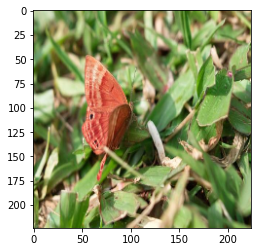

In [137]:
# print(lista_train[:10])
test_file_id = []
from glob import glob

# test_file_id  = [[x, 0] for x in glob('../input/uos-com2028/test/test/*.jpg')]
test_file_id  = [[x, 0] for x in list_of_tests]

test_generator = TestDataGenerator(test_file_id)
test_generator.__getitem__(0)[0]
plt.imshow(test_generator.__getitem__(0)[0][0])

In [146]:
result = loaded_model.predict(test_generator)

In [147]:
print(result.shape)
preds = np.argmax(result, axis=-1)
print(preds[:10])

(15008, 23)
[13 15 18  8  7 18 19 21  5  5]


In [148]:
im = read_and_reisze_image("../input/uos-com2028/test/test/15008.jpg")
im = im/255.
im = np.expand_dims(im, axis=0)

res = loaded_model.predict(im)

In [149]:
print(res.shape)
preds15008 = np.argmax(res, axis=-1)
print(preds15008)

(1, 23)
[17]


In [150]:
import pandas as pd
prediction = pd.DataFrame(preds, columns=['label']).to_csv('prediction.csv')
df.to_csv(index=True)

',ground_truth\n0,5\n1,21\n2,18\n3,2\n4,22\n5,3\n6,15\n7,7\n8,1\n9,15\n10,0\n11,2\n12,14\n13,11\n14,13\n15,20\n16,14\n17,18\n18,21\n19,2\n20,13\n21,6\n22,18\n23,13\n24,18\n25,7\n26,16\n27,20\n28,11\n29,7\n30,15\n31,8\n32,18\n33,20\n34,6\n35,20\n36,18\n37,18\n38,20\n39,20\n40,6\n41,18\n42,16\n43,1\n44,1\n45,18\n46,21\n47,2\n48,18\n49,15\n50,16\n51,19\n52,18\n53,2\n54,7\n55,19\n56,22\n57,18\n58,21\n59,7\n60,11\n61,18\n62,16\n63,15\n64,2\n65,11\n66,21\n67,20\n68,18\n69,21\n70,11\n71,20\n72,16\n73,18\n74,9\n75,7\n76,21\n77,7\n78,22\n79,22\n80,21\n81,22\n82,15\n83,22\n84,20\n85,7\n86,7\n87,7\n88,21\n89,22\n90,6\n91,15\n92,2\n93,5\n94,6\n95,15\n96,11\n97,6\n98,7\n99,21\n100,8\n101,21\n102,1\n103,15\n104,7\n105,1\n106,6\n107,15\n108,18\n109,2\n110,6\n111,18\n112,2\n113,7\n114,16\n115,15\n116,15\n117,20\n118,11\n119,6\n120,18\n121,16\n122,5\n123,11\n124,1\n125,17\n126,7\n127,15\n128,3\n129,11\n130,20\n131,18\n132,7\n133,2\n134,18\n135,18\n136,15\n137,15\n138,18\n139,11\n140,7\n141,1\n142,18\n1